In [3]:
# Please download the zip
# 
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
#     -O /tmp/rps.zip
  
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
#     -O /tmp/rps-test-set.zip

import os 
import zipfile

# local_zip='/tmp/rps.zip'

# zip_ref=zipfile.ZipFile(local_zip,'r')
# zip_ref.extractall('/tmp/')
# zip_ref.close()

# local_zip = '/tmp/rps-test-set.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp/')
# zip_ref.close()

In [4]:

rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock04-059.png', 'rock01-108.png', 'rock04-065.png', 'rock05ck01-067.png', 'rock05ck01-073.png', 'rock04-071.png', 'rock05ck01-098.png', 'rock02-008.png', 'rock07-k03-013.png', 'rock02-034.png']
['paper03-088.png', 'paper05-026.png', 'paper05-032.png', 'paper03-077.png', 'paper03-063.png', 'paper02-099.png', 'paper04-037.png', 'paper04-023.png', 'paper02-066.png', 'paper02-072.png']
['testscissors03-040.png', 'testscissors03-054.png', 'testscissors03-068.png', 'testscissors03-083.png', 'testscissors03-097.png', 'scissors03-113.png', 'scissors03-107.png', 'testscissors02-051.png', 'testscissors02-045.png', 'scissors01-002.png']


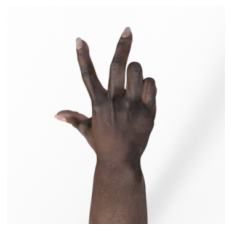

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index=2

next_rock=[os.path.join(rock_dir,fname)
           for fname in rock_files[pic_index-2:pic_index] ]

next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]

next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]


for i,img_path in enumerate(next_rock+next_paper+next_scissors):
    img=mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, 
                    epochs=25, 
                    steps_per_epoch=20, 
                    validation_data = validation_generator,
                    verbose = 1, 
                    validation_steps=3)

model.save("rps.h5")

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 3 steps
Epoch 1/25
20/20 [==============================] - 150s 7s/step - loss: 1.5575 - accuracy: 0.3571 - val_loss: 1.0555 - val_accuracy: 0.3414
Epoch 2/25
20/20 [==============================] - 127s 6s/step - loss: 1.1825 - accuracy: 0.4008 - val_loss: 1.0567 - val_accuracy: 0.5753
Epoch 3/25
20/20 [==============================] - 112s 6s/step - loss: 1.0097 - accuracy: 0.4877 - val_loss: 0.7506 - val_accuracy: 0.7043
Epoch 4/25
20/20 [==============================] - 113s 6s/step - loss: 0.9278 - accuracy: 0.5675 - val_loss: 0.6071 - val_accuracy: 0.6855
Epoch 5/25
20/20 [==============================] - 146s 7s/step - loss: 0.8022 - accuracy: 0.6246 - val_loss: 0.3766 - val_accuracy: 0.8952
Epoch 6/25
20/20 [==============================] - 148s 7s/step - loss: 0.6961 - accuracy: 0.6778 - val_loss: 0.3443 - val_accuracy: 0.7903
Epoch 7/25
20/20 [==============================] - 162s 8s/ste

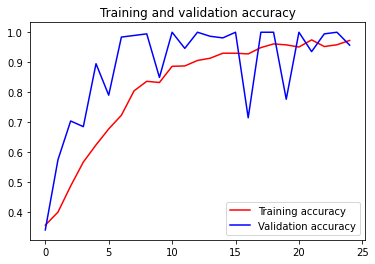

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()